## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

## Load data

In [3]:
df = pd.read_csv(r'heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             920 non-null    int64  
 1   Sex             920 non-null    object 
 2   ChestPainType   920 non-null    object 
 3   RestingBP       920 non-null    int64  
 4   Cholesterol     920 non-null    int64  
 5   FastingBS       920 non-null    int64  
 6   RestingECG      920 non-null    object 
 7   MaxHR           920 non-null    int64  
 8   ExerciseAngina  920 non-null    object 
 9   Oldpeak         920 non-null    float64
 10  ST_Slope        920 non-null    object 
 11  HeartDisease    920 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.4+ KB


In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data cleaning

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(2)

In [9]:
df.drop_duplicates(inplace=True)

## EDA (Exploratory Data Analysis)

In [10]:
# Categorical features
cat_features = df.select_dtypes(include='object').columns

print(f'Categorical features: {cat_features.tolist()}')
print(f'Number of categorical features: {len(cat_features)}')

Categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Number of categorical features: 5


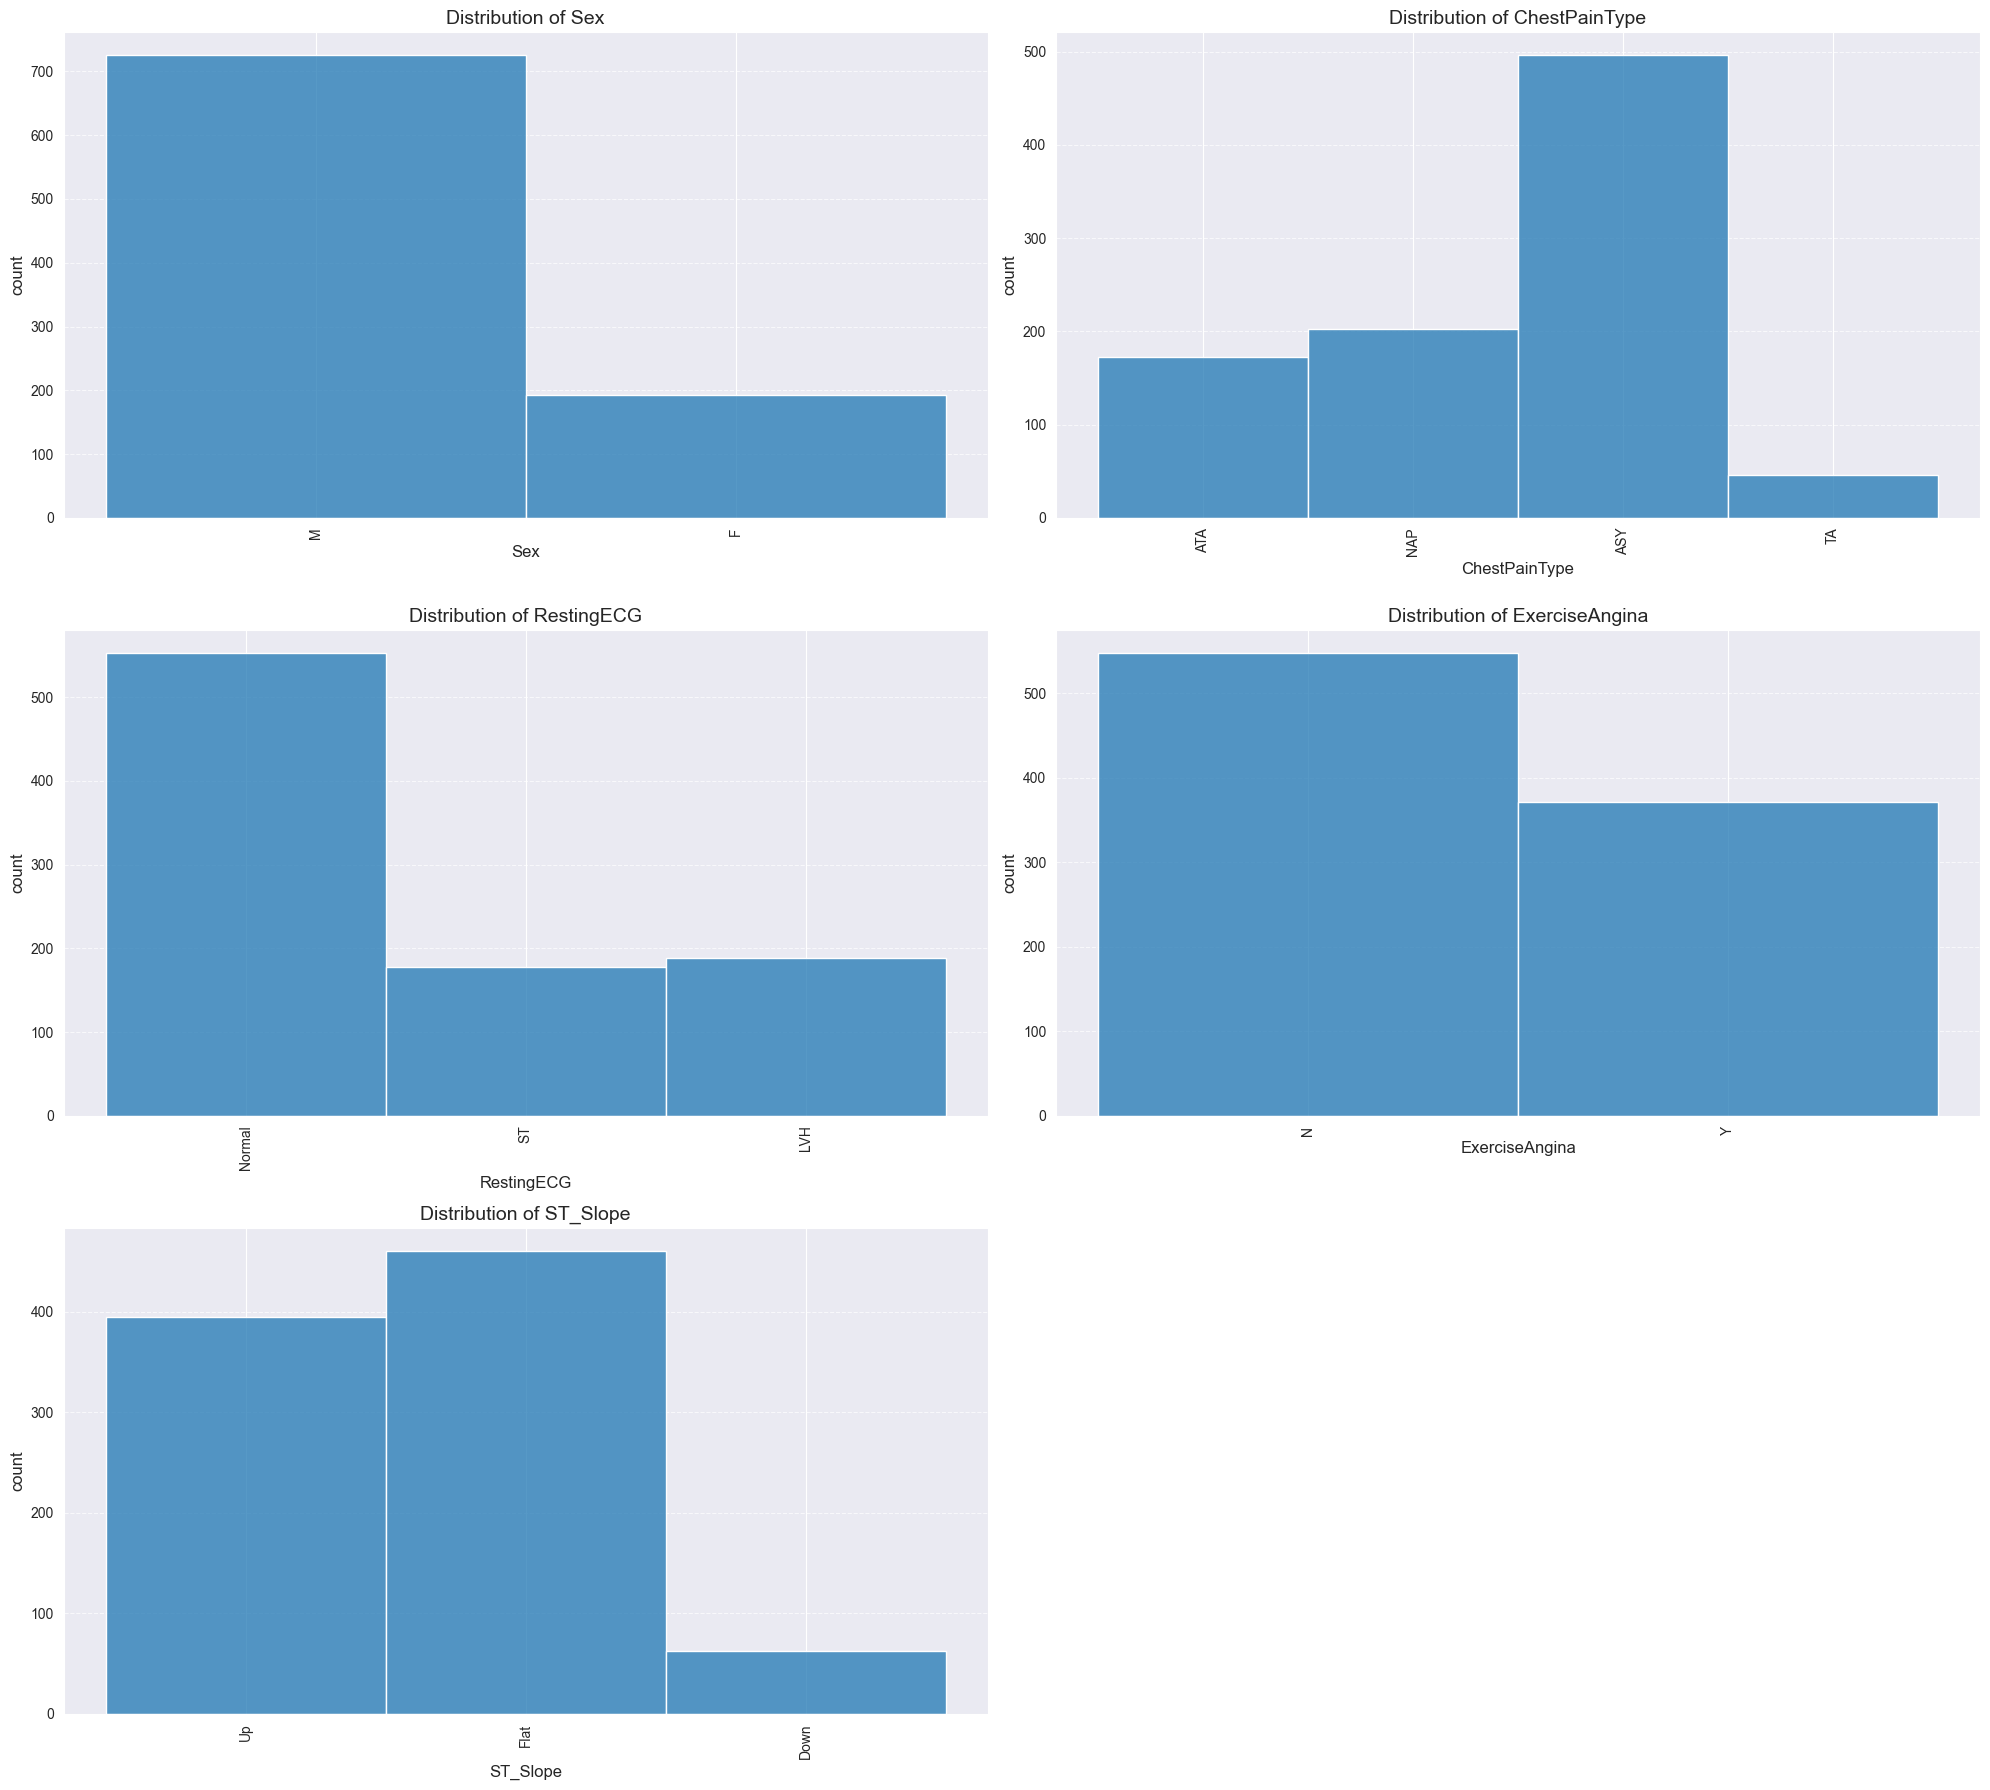

In [11]:
num_column = 2
num_row = (len(cat_features) + 1) // num_column

fig, axes = plt.subplots(num_row, num_column, figsize=(20, num_row * 6))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    ax = axes[i]
    sns.histplot(data=df, x=col, ax=ax)

    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('count', fontsize=12)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(axis='y', alpha=0.7, linestyle='--')

for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Categorical Data Analysis – Summary


#### -The distribution of categorical features reveals several important patterns in the dataset. The Sex variable is highly imbalanced, with male patients significantly outnumbering females, which may introduce bias in predictive models.

#### -For ChestPainType, the majority of patients fall into the ASY (asymptomatic) category, while TA is the least frequent. This indicates that many patients do not present typical chest pain symptoms, emphasizing the importance of other clinical features.

#### -The RestingECG feature shows that most patients have a Normal ECG at rest, suggesting limited diagnostic power when used alone. In contrast, ExerciseAngina shows a meaningful distribution, where a considerable proportion of patients experience angina during physical activity.

#### -Finally, ST_Slope is mainly distributed between Flat and Up, with Down being relatively rare. Clinically, Flat and Down slopes are often associated with higher cardiovascular risk, making this feature potentially important for modeling.

#### -Overall, the analysis highlights data imbalance and suggests that several categorical features carry useful predictive information for heart disease classification.

## Bivariate analysis for categorical data

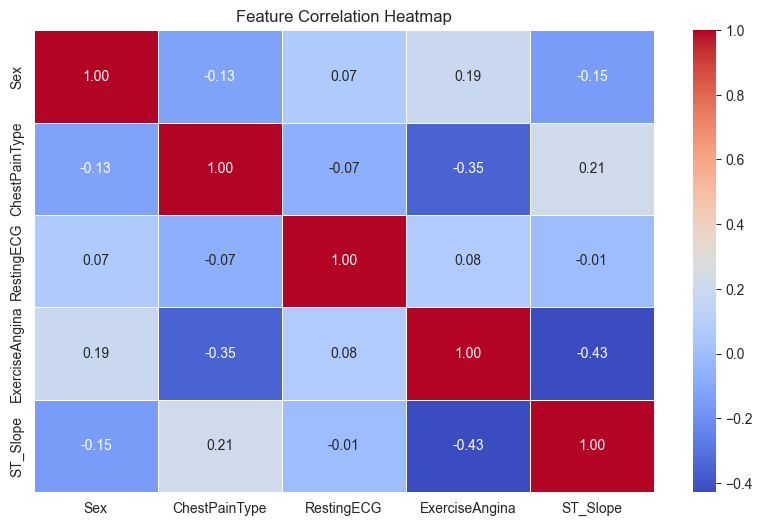

In [12]:
# For corr_matrix we need our categories to be encoded

encoder_ordinal=OrdinalEncoder()

df_new=pd.DataFrame(encoder_ordinal.fit_transform(df[cat_features]),columns=encoder_ordinal.get_feature_names_out(),index=df.index)

corr_matrix = df_new.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

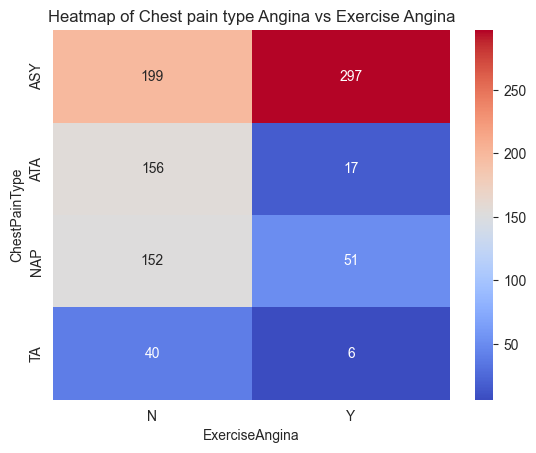

In [17]:
crosstab = pd.crosstab(df["ChestPainType"], df["ExerciseAngina"])
sns.heatmap(crosstab, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Chest pain type Angina vs Exercise Angina")
plt.show()

#### -There is a clear relationship between the type of chest pain and exercise-induced angina.
#### -The ASY group shows the highest incidence of exercise-induced angina → indicating a high hidden risk.
#### -ATA and NAP are mostly without exercise-induced angina.
#### -This pattern is very important for the diagnosis and modeling of heart disease.

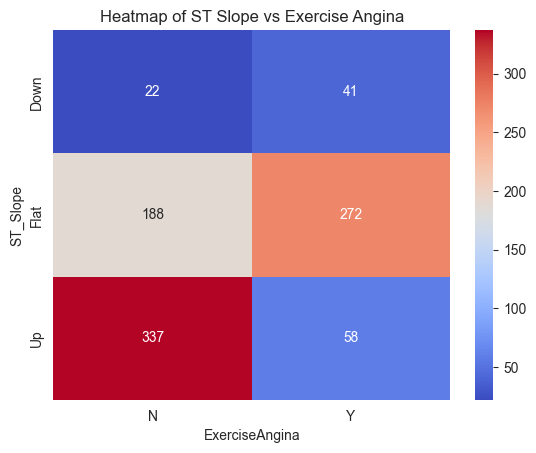

In [19]:
crosstab = pd.crosstab(df["ST_Slope"], df["ExerciseAngina"])
sns.heatmap(crosstab, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of ST Slope vs Exercise Angina")
plt.show()

#### -Up ST Slope is mostly associated with no exercise-induced angina → better cardiac condition
#### -Flat ST Slope shows the strongest association with exercise angina → higher risk
#### -Down ST Slope is less common but may indicate an unfavorable cardiac status

### Conclusion:
#### -As ST Slope changes from Up → Flat → Down, the likelihood of exercise angina and cardiac risk increases.